# WSI Lab 06 - Filip Ryniewicz
Implementacja algorytmu uczenia ze wzmocnieniem - qlearning i przetestowanie go na grze 'Taxi-v3' z pakietu gym.

## Decyzje projektowe
- zdecydowałem się na stałe learning rate
- agent w trakcie uczenia podejmuje decyzje o kolejnym ruchu zgodnie z epsilon-zachłanną polityką
- exploration_rate jest modyfikowane w trakcie przebiegu uczenia w celu priorytetyzowania eksploracji na początku i eksploitacji pod koniec. exploration_rate jest zmieniane zgodnie z tym wzorem:
$$
\epsilon = (\epsilon_{\text{{min}}} +
(\epsilon_{\text{{max}}} - \epsilon_{\text{{min}}})
\times \exp(-\delta \times i))
$$


## Hiperparametry

- learning_rate - kontroluje zmiane wartości w qtable (0.1)
- discount_factor - stosunek przyszłych nagród do bieżacych (0.7)
- exploration_rate - współczynnik według którego, algorytm wybiera eksploracje/eksploitacje
- max_exploration_rate - początkowa wartość exploration_rate (1)
- min_exploration_rate - końcowa wartość exploration_rate (0.05)
- n_games - ilość gier uczących (10000)
- max_steps - maksymalna ilość kroków w każdej grze (1000)
- eval_freq - jak często ewaluacja (100)
- eval_len - ilość gier ewaluacyjnych (10)

## Działanie wytrenowanego agenta 

Szybkie demo jak zachowuje się agent po 10000 rozegranych gier.

In [3]:
import gym
from agent import Agent
from report_utils import show_agent_behaviour
from IPython.display import clear_output

agent = Agent()
environment = gym.make('Taxi-v3')
print("agent is learning")
agent.qlearn(environment, 10000, 1000)
clear_output(wait=True)
environment = gym.make('Taxi-v3', render_mode='ansi')
show_agent_behaviour(agent, environment, 0.5)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)



# Wykres nagród uzyskanych przez agenta w trakcie uczenia

W tym eksperymencie sprawdzę skuteczność agenta w trakcie uczenia. W tym celu z każdej gry w trakcie uczenia wyliczam sumę nagród uzyskanych przez agenta w każdym ruchu, a następnie na wykresie przedstawiam uśrednione wartości sumy nagród z 10 kolejnych rozgrywek (uśrednienie w celu wygładzenia wykresu). Agent uczy się na 1000 grach, gdzie każda zostaje automatycznie zatrzymana po 1000 ruchach (lub zakończeniu).

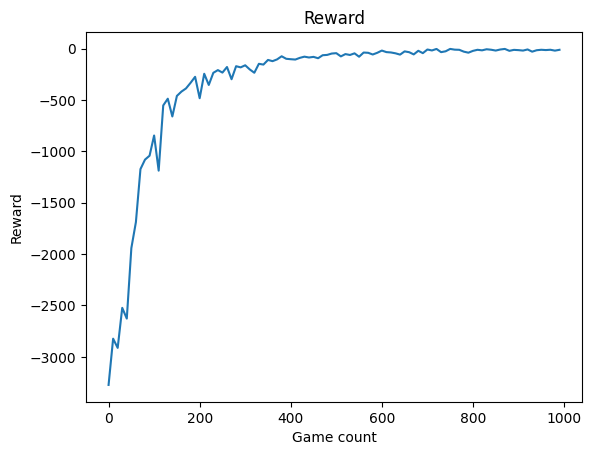

In [1]:
from report_utils import plot_rewards

plot_rewards()

Jak widać na powyższym wykresie, na początku uczenia agent popełnia bardzo dużo błędów i jest za to karany. Wynika to z tego, że na początku uczenia piorytetyzuje eksplorację. Wraz z uczeniem, agent robi coraz mniej błędów i po ok. 400 grach - średnie nagrody wachają się w okolicy 0 (20 pkt za poprawne wykonanie zadania i -1 pkt za każdy wykonany ruch).

## Wykres przegranych gier w trakcie uczenia

W tym eksperymencie badam błędy popełniane przez agenta w trakcie uczenia. W tym celu zliczam przegrane gry (dropoff pasażera w złym miejscu) i tworzę wykres przestawiający ilość przegranych w każdych 10 kolejnych grach.

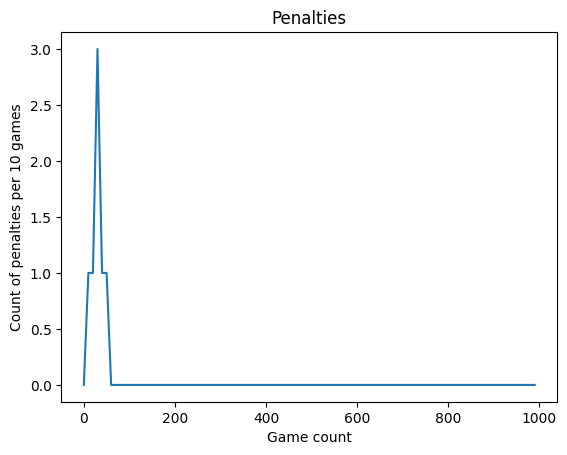

In [1]:
from report_utils import plot_penalties

plot_penalties()

Jak widać na powyższym wykresie, agent przegrywa gry tylko na początku uczenia (wtedy kiedy qtable jeszcze nie jest dobrze zdefiniowane i agent priorytetyzuje eksploracje (losowe ruchy)). Po około 100 grach agent przestaje przegrywać gry, ale to nie znaczy, że przestaje się uczyć i popełniać błędy. Wynika to z poprzedniego eksperymentu, gdzie pokazałem, że wtedy agent po 100 grach jeszcze nie jest w pełni nauczony i nadal robi dużo nieoptymalnych ruchów.

## Nagrody z ewaluacji

W tym eksperymencie uczę agenta przez 10000 gier, sprawdzając działanie jego qtable co 100 gier.

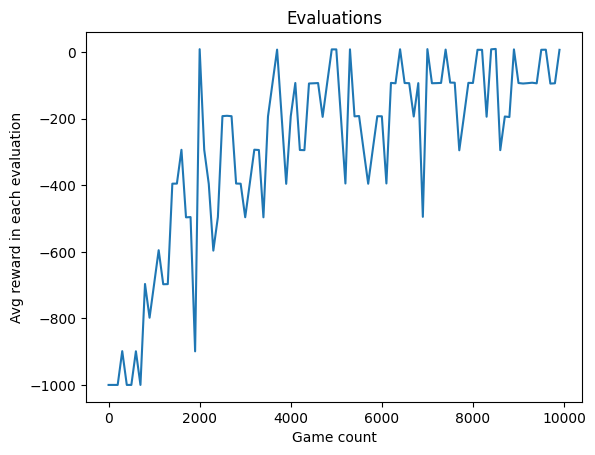

In [1]:
from report_utils import plot_evaluations

plot_evaluations()

Jak widać na powyższym wykresie średnie nagrody uzyskane w ewaluacjach rosną wraz z przebiegiem uczenia. Na początku nagrody te są bardzo niskie, co wynika z niekompletnej qtable, a wraz z kolejnymi grami i poprawianiem tabeli - nagrody były coraz lepsze. Wydaje mi się, że wachania na wykresie mogą wynikać z nieoptymalnego dobrania wartości hiperparametrów.

## Wnioski końcowe

Qlearning jest dobrym algorytmem, który może być zastosowany do szerokiej gamy różnych gier o małej ilości możliwych akcji. Algorytm działa bardzo szybko, a nauczenie się gry zajmuje mu tylko kilka/kilkanaście sekund. Duża ilość parametrów daje możliwość lepszego dostosowania algorytmu do konkretnego problemu, lecz znalezienie odpowiednich wartości może być uciążliwe.
Doszedłem również do wniosku, że przy małej ilości rozegranych gier, algorytm może nie przebadać znacznej części stanów, co skutkuje tym, że qtable dla tych stanów będzie pusta. Jeśli niekompletnie przetrenowany agent znajdzie się w stanie w jakim jeszcze nie był, będzie nieustannie robić ten sam ruch i nie rozwiąże zagadki. Rozwiązaniem tego problemu mogłoby być przetrenowanie agenta na wszystkich możliwych stanach z wystarczająco dużym exploration_rate, lecz pakiet gym nie pozwala na zainicjowanie środowiska z zadanym stanem poczatkowym.